# Código Enade

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

enade = []

#ENADE 2017
enade2017 = pandas.read_csv("datasets\MICRODADOS_ENADE_2017.txt", sep=';',dtype={"DS_VT_ESC_OFG": str, 
                                                                               'DS_VT_ESC_OCE':str,
                                                                              'DS_VT_ACE_OCE':str,
                                                                              'NT_GER':str,
                                                                              'NT_FG':str,
                                                                              'NT_OBJ_FG':str,
                                                                              'NT_DIS_FG':str,
                                                                              'NT_CE':str,
                                                                              'NT_OBJ_CE':str,
                                                                              'NT_DIS_CE':str,
                                                                            'CO_CATEGAD':str})


enade2017.shape
enade2017.columns[0:14]
enade.append(enade2017)

In [2]:
#ENADE 2016
enade2016 = pandas.read_csv("datasets\MICRODADOS_ENADE_2016.txt", sep=';',dtype={"DS_VT_ESC_OFG": str, 
                                                                               'DS_VT_ESC_OCE':str,
                                                                              'DS_VT_ACE_OCE':str,
                                                                              'NT_GER':str,
                                                                              'NT_FG':str,
                                                                              'NT_OBJ_FG':str,
                                                                              'NT_DIS_FG':str,
                                                                              'NT_CE':str,
                                                                              'NT_OBJ_CE':str,
                                                                              'NT_DIS_CE':str,
                                                                            'CO_CATEGAD':str})


enade2016.shape
enade2016.columns[0:14]
enade.append(enade2016)

In [3]:
#ENADE 2015
enade2015 = pandas.read_csv("datasets\MICRODADOS_ENADE_2015.txt", sep=';',dtype={"DS_VT_ESC_OFG": str, 
                                                                               'DS_VT_ESC_OCE':str,
                                                                              'DS_VT_ACE_OCE':str,
                                                                              'NT_GER':str,
                                                                              'NT_FG':str,
                                                                              'NT_OBJ_FG':str,
                                                                              'NT_DIS_FG':str,
                                                                              'NT_CE':str,
                                                                              'NT_OBJ_CE':str,
                                                                              'NT_DIS_CE':str,
                                                                            'CO_CATEGAD':str}, low_memory=False)


enade2015.shape
enade2015.columns[0:14]
enade.append(enade2015)

In [4]:
#ENADE 2014
enade2014 = pandas.read_csv("datasets\MICRODADOS_ENADE_2014.txt", sep=';',dtype={"DS_VT_ESC_OFG": str, 
                                                                               'DS_VT_ESC_OCE':str,
                                                                              'DS_VT_ACE_OCE':str,
                                                                              'NT_GER':str,
                                                                              'NT_FG':str,
                                                                              'NT_OBJ_FG':str,
                                                                              'NT_DIS_FG':str,
                                                                              'NT_CE':str,
                                                                              'NT_OBJ_CE':str,
                                                                              'NT_DIS_CE':str,
                                                                            'CO_CATEGAD':str}, low_memory=False)



enade2014.shape
enade2014.columns[0:14]
enade.append(enade2014)

In [5]:
#ENADE 2013
enade2013 = pandas.read_csv("datasets\MICRODADOS_ENADE_2013.txt", sep=';',dtype={"DS_VT_ESC_OFG": str, 
                                                                               'DS_VT_ESC_OCE':str,
                                                                              'DS_VT_ACE_OCE':str,
                                                                              'NT_GER':str,
                                                                              'NT_FG':str,
                                                                              'NT_OBJ_FG':str,
                                                                              'NT_DIS_FG':str,
                                                                              'NT_CE':str,
                                                                              'NT_OBJ_CE':str,
                                                                              'NT_DIS_CE':str,
                                                                            'CO_CATEGAD':str})


enade2013.shape
enade2013.columns[0:14]
enade.append(enade2013)

Variáveis a serem exploradas neste trabalho

Código = QE_I17
Descrição:
A = Todo em escola pública.
B = Todo em escola privada (particular).
C = Todo no exterior.
D = A maior parte em escola pública.
E = A maior parte em escola privada (particular).
F = Parte no Brasil e parte no exterior

Código = CO_REGIAO_CURSO
Descrição:
11 = Rondônia (RO)                              28 = Sergipe (SE)
12 = Acre (AC)                                         29 = Bahia (BA)
13 = Amazonas (AM)                            31 = Minas gerais (MG)
14 = Roraima (RR)                                  32 = Espírito santo (ES)
15 = Pará (PA)                                          33 = Rio de janeiro (RJ)
16 = Amapa (AP)                                    35 = São paulo (SP)
17 = Tocantins (TO)                               41 = Paraná (PR)
21 = Maranhão (MA)                             42 = Santa catarina (SC)
22 = Piauí (PI)                                           43 = Rio grande do sul (RS)
23 = Ceará (CE)                                        50 = Mato grosso do sul (MS)
24 = Rio Grande do Norte (RN)         51 = Mato grosso (MT)
25 = Paraíba (PB)                                     52 = Goiás (GO)
26 = Pernambuco (PE)                          53 = Distrito federal (DF)
27 = Alagoas (AL)   

Código = NU_IDADE
Descrição:
min = 10
max = 95

Código = TP_SEXO
Descrição:
M = Masculino
F = Feminino                                                                                                                                  
Código = CO_TURNO_GRADUACAO
Descrição:
1 = Matutino
2 = Vespertino
3 = Integral
4 = Noturno

In [6]:
tabela = []

tabela17 = pandas.DataFrame(enade[0], columns = ['CO_CATEGAD', 'QE_I17','NU_IDADE', 'TP_SEXO'])
# tabela17 = pandas.DataFrame(enade[0], columns = ['CO_REGIAO_CURSO', 'CO_CATEGAD', 'QE_I17','NU_IDADE', 'TP_SEXO', 'QE_I08', 'QE_I02'])
# tabela17 = pandas.DataFrame(enade[0], columns = ['CO_REGIAO_CURSO', 'CO_CATEGAD', 'QE_I17','NU_IDADE', 'TP_SEXO', 'QE_I08'])
# tabela17 = pandas.DataFrame(enade[0], columns = ['CO_REGIAO_CURSO', 'CO_CATEGAD', 'QE_I17', 'TP_SEXO', 'QE_I08'])

##Ignora valores nulos
tabela17 = tabela17.loc[(tabela17['QE_I17'].notnull())]
tabela17 = tabela17.loc[(tabela17['CO_CATEGAD'].notnull())]
# tabela17 = tabela17.loc[(tabela17['CO_REGIAO_CURSO'].notnull())]
tabela17 = tabela17.loc[(tabela17['NU_IDADE'].notnull())]
# tabela17 = tabela17.loc[(tabela17['QE_I02'].notnull())]
tabela17 = tabela17.loc[(tabela17['TP_SEXO'].notnull())]
# tabela17 = tabela17.loc[(tabela17['QE_I08'].notnull())]
# tabela17 = tabela17.loc[(tabela17['CO_TURNO_GRADUACAO'].notnull())]


'''
1 - A = Todo em escola pública, D = A maior parte em escola pública.
2 - B = Todo em escola privada (particular), E = A maior parte em escola privada (particular).
3 - C = Todo no exterior, F = Parte no Brasil e parte no exterior
'''

##Mapeamento questão 17
tabela17['QE_I17'] = tabela17['QE_I17'].map({'A': 1, 'B': 2, 'C': 3, 'D': 1,'E': 2, 'F':3})

#Mapeamento tipo sexo
tabela17['TP_SEXO'] = tabela17['TP_SEXO'].map({'M': 0, 'F': 1})
#tabela.head(10)

##Mapeamento CO_CATEGAD
tabela17['CO_CATEGAD'] = tabela17['CO_CATEGAD'].map({'1': 0, '2': 0, '3': 0, '4' : 1, '5' : 1, '7' : 2})

# ##Mapeamento RENDA
# tabela17['QE_I08'] = tabela17['QE_I08'].map({'A': 1, 'B': 2, 'C': 3, 'D' : 4, 'E' : 5, 'F' : 6, 'G' : 7})

# ##Mapeamento COR
# tabela17['QE_I02'] = tabela17['QE_I02'].map({'A': 1, 'B': 2, 'C': 3, 'D' : 4, 'E' : 5, 'F' : 6})

tabela.append(tabela17)

In [7]:
tabela16 = pandas.DataFrame(enade[1], columns = ['CO_REGIAO_CURSO', 'CO_CATEGAD', 'QE_I17','NU_IDADE', 'TP_SEXO'])

##Ignora valores nulos
tabela16 = tabela16.loc[(tabela16['QE_I17'].notnull())]
tabela16 = tabela16.loc[(tabela16['CO_CATEGAD'].notnull())]
tabela16 = tabela16.loc[(tabela16['CO_REGIAO_CURSO'].notnull())]
tabela16 = tabela16.loc[(tabela16['NU_IDADE'].notnull())]
tabela16 = tabela16.loc[(tabela16['TP_SEXO'].notnull())]
# tabela16 = tabela16.loc[(tabela16['CO_TURNO_GRADUACAO'].notnull())]

'''
1 - A = Todo em escola pública, D = A maior parte em escola pública.
2 - B = Todo em escola privada (particular), E = A maior parte em escola privada (particular).
3 - C = Todo no exterior, F = Parte no Brasil e parte no exterior
'''

##Mapeamento questão 17
tabela16['QE_I17'] = tabela16['QE_I17'].map({'A': 1, 'B': 2, 'C': 3, 'D': 1,'E': 2, 'F':3})
#tabela.head(10)

''' Código da categoria administrativa da IES
93 = Pessoa Jurídica de Direito Público - Federal 
115 = Pessoa Jurídica de Direito Público - Estadual
116 = Pessoa Jurídica de Direito Público - Municipal
118 = Pessoa Jurídica de Direito Privado - Com fins lucrativos - Sociedade Civil
121 = Pessoa Jurídica de Direito Privado - Sem fins lucrativos - Fundação
10001 = Pessoa Jurídica de Direito Público - Estadual
10002 = Pessoa Jurídica de Direito Público - Federal
10003 = Pessoa Jurídica de Direito Público - Municipal
10004 = Pessoa Jurídica de Direito Privado - Com fins lucrativos - Associação de Utilidade Pública
10005 = Privada com fins lucrativos
10006 = Pessoa Jurídica de Direito Privado - Com fins lucrativos - Sociedade Mercantil ou Comercial
10007 = Pessoa Jurídica de Direito Privado - Sem fins lucrativos - Associação de Utilidade Pública
10008 = Privada sem fins lucrativos
10009 = Pessoa Jurídica de Direito Privado - Sem fins lucrativos - Sociedade
17634 = Fundação Pública de Direito Privado Municípal
'''

##Mapeamento CO_CATEGAD
tabela16['CO_CATEGAD'] = tabela16['CO_CATEGAD'].map({'93': 1, '115': 2, '116': 3, '118' : 4, '121' : 5, '10002': 1,
                                                     '10001' : 2, '10003' : 3, '10004' : 4, '10005' : 4, '10006' : 4, 
                                                    '10007' : 5, '10008' : 5, '10009' : 5})
#tabela.head(10)

tabela.append(tabela16)
#tabela[1].head(10)

In [8]:
tabela15 = pandas.DataFrame(enade[2], columns = ['CO_REGIAO_CURSO', 'CO_CATEGAD', 'QE_I17','NU_IDADE', 'TP_SEXO'])

##Ignora valores nulos
tabela15 = tabela15.loc[(tabela15['QE_I17'].notnull())]
tabela15 = tabela15.loc[(tabela15['CO_CATEGAD'].notnull())]
tabela15 = tabela15.loc[(tabela15['CO_REGIAO_CURSO'].notnull())]
tabela15 = tabela15.loc[(tabela15['NU_IDADE'].notnull())]
tabela15 = tabela15.loc[(tabela15['TP_SEXO'].notnull())]
# tabela15 = tabela15.loc[(tabela15['CO_TURNO_GRADUACAO'].notnull())]

##Mapeamento questão 17
tabela15['QE_I17'] = tabela15['QE_I17'].map({'A': 1, 'B': 2, 'C': 3, 'D': 1,'E': 2, 'F':3})
#tabela.head(10)

'''
93 = Pessoa Jurídica de Direito Público - Federal 
115 = Pessoa Jurídica de Direito Público - Estadual
116 = Pessoa Jurídica de Direito Público - Municipal
118 = Pessoa Jurídica de Direito Privado - Com fins lucrativos - Sociedade Civil
121 = Pessoa Jurídica de Direito Privado - Sem fins lucrativos - Fundação
10001 = Pessoa Jurídica de Direito Público - Estadual
10002 = Pessoa Jurídica de Direito Público - Federal
10003 = Pessoa Jurídica de Direito Público - Municipal
10005 = Privada com fins lucrativos
10006 = Pessoa Jurídica de Direito Privado - Com fins lucrativos - Sociedade Mercantil ou Comercial
10007 = Pessoa Jurídica de Direito Privado - Sem fins lucrativos - Associação de Utilidade Pública
10008 = Privada sem fins lucrativos
10009 = Pessoa Jurídica de Direito Privado - Sem fins lucrativos - Sociedade
'''

##Mapeamento CO_CATEGAD
tabela15['CO_CATEGAD'] = tabela15['CO_CATEGAD'].map({'93': 1, '115': 2, '116': 3, '118' : 4, '121' : 5, '10002': 1,
                                                     '10001' : 2, '10003' : 3, '10005' : 4, '10006' : 4, 
                                                    '10007' : 5, '10008' : 5, '10009' : 5})

tabela.append(tabela15)

In [9]:
tabela14 = pandas.DataFrame(enade[3], columns = ['CO_REGIAO_CURSO', 'CO_CATEGAD', 'QE_I17','NU_IDADE', 'TP_SEXO'])

##Ignora valores nulos
tabela14 = tabela14.loc[(tabela14['QE_I17'].notnull())]
tabela14 = tabela14.loc[(tabela14['CO_CATEGAD'].notnull())]
tabela14 = tabela14.loc[(tabela14['CO_REGIAO_CURSO'].notnull())]
tabela14 = tabela14.loc[(tabela14['NU_IDADE'].notnull())]
tabela14 = tabela14.loc[(tabela14['TP_SEXO'].notnull())]
# tabela14 = tabela14.loc[(tabela14['CO_TURNO_GRADUACAO'].notnull())]

##Mapeamento questão 17
tabela14['QE_I17'] = tabela14['QE_I17'].map({'A': 1, 'B': 2, 'C': 3, 'D': 1,'E': 2, 'F':3})
#tabela.head(10)

'''
93 = Pessoa Jurídica de Direito Público - Federal
116 = Pessoa Jurídica de Direito Público - Municipal
118 = Pessoa Jurídica de Direito Privado - Com fins lucrativos - Sociedade Civil
121 = Pessoa Jurídica de Direito Privado - Sem fins lucrativos - Fundação
10001 = Pessoa Jurídica de Direito Público - Estadual
10002 = Pessoa Jurídica de Direito Público - Federal
10003 = Pessoa Jurídica de Direito Público - Municipal
10004 = Pessoa Jurídica de Direito Privado - Com fins lucrativos - Associação de Utilidade Pública
10005 = Privada com fins lucrativos
10006 = Pessoa Jurídica de Direito Privado - Com fins lucrativos - Sociedade Mercantil ou Comercial
10007 = Pessoa Jurídica de Direito Privado - Sem fins lucrativos - Associação de Utilidade Pública
10008 = Privada sem fins lucrativos
10009 = Pessoa Jurídica de Direito Privado - Sem fins lucrativos - Sociedade
'''

##Mapeamento CO_CATEGAD
tabela14['CO_CATEGAD'] = tabela14['CO_CATEGAD'].map({'93': 1, '116': 3, '118' : 4, '121' : 5, '10002': 1,
                                                     '10001' : 2, '10003' : 3, '10005' : 4, '10004' : 4, '10006' : 4, 
                                                    '10007' : 5, '10008' : 5, '10009' : 5})

tabela.append(tabela14)
#tabela[3].head(10)


In [10]:
tabela13 = pandas.DataFrame(enade[4], columns = ['CO_REGIAO_CURSO', 'CO_CATEGAD', 'QE_I17','NU_IDADE', 'TP_SEXO'])

##Ignora valores nulos
tabela13 = tabela13.loc[(tabela13['QE_I17'].notnull())]
tabela13 = tabela13.loc[(tabela13['CO_CATEGAD'].notnull())]
tabela13 = tabela13.loc[(tabela13['CO_REGIAO_CURSO'].notnull())]
tabela13 = tabela13.loc[(tabela13['NU_IDADE'].notnull())]
tabela13 = tabela13.loc[(tabela13['TP_SEXO'].notnull())]
# tabela13 = tabela13.loc[(tabela13['CO_TURNO_GRADUACAO'].notnull())]

##Mapeamento questão 17
tabela13['QE_I17'] = tabela13['QE_I17'].map({'A': 1, 'B': 2, 'C': 3, 'D': 1,'E': 2, 'F':3})
#tabela.head(10)

'''
93 = Pessoa Jurídica de Direito Público - Federal
116 = Pessoa Jurídica de Direito Público - Municipal
118 = Pessoa Jurídica de Direito Privado - Com fins lucrativos - Sociedade Civil
121 = Pessoa Jurídica de Direito Privado - Sem fins lucrativos - Fundação
10001 = Pessoa Jurídica de Direito Público - Estadual
10002 = Pessoa Jurídica de Direito Público - Federal
10003 = Pessoa Jurídica de Direito Público - Municipal
10005 = Privada com fins lucrativos
10006 = Pessoa Jurídica de Direito Privado - Com fins lucrativos - Sociedade Mercantil ou Comercial
10007 = Pessoa Jurídica de Direito Privado - Sem fins lucrativos - Associação de Utilidade Pública
10008 = Privada sem fins lucrativos
10009 = Pessoa Jurídica de Direito Privado - Sem fins lucrativos - Sociedade
'''

##Mapeamento CO_CATEGAD
tabela13['CO_CATEGAD'] = tabela13['CO_CATEGAD'].map({'93': 1, '116': 3, '118' : 4, '121' : 5, '10002': 1,
                                                     '10001' : 2, '10003' : 3, '10005' : 4, '10006' : 4, 
                                                    '10007' : 5, '10008' : 5, '10009' : 5})

tabela.append(tabela13)

In [11]:
escola_publica = []
escola_privada = []
escola_exterior = []

escola_publica17 = tabela[0][tabela[0]['QE_I17'] == 1]
escola_privada17 = tabela[0][tabela[0]['QE_I17'] == 2]
escola_exterior17 = tabela[0][tabela[0]['QE_I17'] == 3]

escola_publica.append(escola_publica17)
escola_privada.append(escola_privada17)
escola_exterior.append(escola_exterior17)

escola_publica[0].describe()

,CO_REGIAO_CURSO,CO_CATEGAD,QE_I17,NU_IDADE,TP_SEXO,CO_TURNO_GRADUACAO
count,340346.000000,340346.000000,340346.0,340346.000000,340346.000000,340346.000000
mean,3.072838,3.454155,1.0,29.681988,0.586962,3.390218
std,1.000818,1.511883,0.0,8.264689,0.492380,1.041126
min,1.000000,1.000000,1.0,16.000000,0.000000,1.000000
25%,3.000000,2.000000,1.0,23.000000,0.000000,3.000000
50%,3.000000,4.000000,1.0,27.000000,1.000000,4.000000
75%,4.000000,5.000000,1.0,34.000000,1.000000,4.000000
max,5.000000,7.000000,1.0,87.000000,1.000000,4.000000


In [12]:
escola_privada[0].describe()

,CO_REGIAO_CURSO,CO_CATEGAD,QE_I17,NU_IDADE,TP_SEXO,CO_TURNO_GRADUACAO
count,125481.000000,125481.000000,125481.0,125481.000000,125481.000000,125481.000000
mean,3.003459,3.090587,2.0,26.784238,0.452690,3.069309
std,0.914649,1.688268,0.0,6.977546,0.497759,1.102299
min,1.000000,1.000000,2.0,18.000000,0.000000,1.000000
25%,2.000000,1.000000,2.0,23.000000,0.000000,3.000000
50%,3.000000,4.000000,2.0,24.000000,0.000000,3.000000
75%,3.000000,5.000000,2.0,28.000000,1.000000,4.000000
max,5.000000,7.000000,2.0,85.000000,1.000000,4.000000


In [13]:

escola_exterior[0].describe()

,CO_REGIAO_CURSO,CO_CATEGAD,QE_I17,NU_IDADE,TP_SEXO,CO_TURNO_GRADUACAO
count,1448.000000,1448.000000,1448.0,1448.000000,1448.000000,1448.000000
mean,3.222376,3.371547,3.0,27.767956,0.440608,3.026934
std,0.792325,1.665145,0.0,7.583765,0.496632,1.112208
min,1.000000,1.000000,3.0,19.000000,0.000000,1.000000
25%,3.000000,1.000000,3.0,23.000000,0.000000,3.000000
50%,3.000000,4.000000,3.0,25.000000,0.000000,3.000000
75%,4.000000,5.000000,3.0,29.000000,1.000000,4.000000
max,5.000000,7.000000,3.0,67.000000,1.000000,4.000000


In [14]:
''' CO_CATEGAD
Código da categoria administrativa da IES
1 = Pública Federal
2 = Pública Estadual
3 = Pública Municipal
4 = Privada com fins lucrativos
5 = Privada sem fins lucrativos
7 = Especial
'''

#Lista alunos que estudaram em escola pública
p_ip = [] #ensino superior público
p_ipp = [] #ensino superior privado
pf = [] #ensino superior federal
pe = [] #ensino superior estadual
pm = [] #ensino superior municipal
pcl = [] #ensino superior privado c/ lucrativo
psl = [] #ensino superior privado s/ lucrativo

# ESCOLA PUBLICA vs CO_CATEGAD
p_ip17 = escola_publica[0].loc[(escola_publica[0].CO_CATEGAD == 1) | (escola_publica[0].CO_CATEGAD == 2) | (escola_publica[0].CO_CATEGAD == 3)]
p_ipp17 = escola_publica[0].loc[(escola_publica[0].CO_CATEGAD == 4) | (escola_publica[0].CO_CATEGAD == 5)]
pf17 = escola_publica[0].loc[(escola_publica[0].CO_CATEGAD == 1)]
pe17 = escola_publica[0].loc[(escola_publica[0].CO_CATEGAD == 2)]
pm17 = escola_publica[0].loc[(escola_publica[0].CO_CATEGAD == 3)]
pcl17 = escola_publica[0].loc[(escola_publica[0].CO_CATEGAD == 4)]
psl17 = escola_publica[0].loc[(escola_publica[0].CO_CATEGAD == 5)]

p_ip.append(p_ip17)
p_ipp.append(p_ipp17)
pf.append(pf17)
pe.append(pe17)
pm.append(pm17)
pcl.append(pcl17)
psl.append(psl17)

#Lista alunos que estudaram em escola privada
pp_ip = [] #ensino superior público
pp_ipp = [] #ensino superior privado
ppf = [] #ensino superior federal
ppe = [] #ensino superior estadual
ppm = [] #ensino superior municipal
ppcl = [] #ensino superior privado c/ lucrativo
ppsl = [] #ensino superior privado s/ lucrativo

# ESCOLA PRIVADA vs CO_CATEGAD
pp_ip17 = escola_privada[0].loc[(escola_privada[0].CO_CATEGAD == 1) | (escola_privada[0].CO_CATEGAD == 2) | (escola_privada[0].CO_CATEGAD == 3)]
pp_ipp17 = escola_privada[0].loc[(escola_privada[0].CO_CATEGAD == 4) | (escola_privada[0].CO_CATEGAD == 5)]
ppf17 = escola_privada[0].loc[(escola_privada[0].CO_CATEGAD == 1)]
ppe17 = escola_privada[0].loc[(escola_privada[0].CO_CATEGAD == 2)]
ppm17 = escola_privada[0].loc[(escola_privada[0].CO_CATEGAD == 3)]
ppcl17 = escola_privada[0].loc[(escola_privada[0].CO_CATEGAD == 4)]
ppsl17 = escola_privada[0].loc[(escola_privada[0].CO_CATEGAD == 5)]

pp_ip.append(pp_ip17)
pp_ipp.append(pp_ipp17)
ppf.append(ppf17)
ppe.append(ppe17)
ppm.append(ppm17)
ppcl.append(ppcl17)
ppsl.append(ppsl17)

#Lista alunos que estudaram em escola no exterior
e_ip = [] #ensino superior público
e_ipp = [] #ensino superior privado
ef = [] #ensino superior federal
ee = [] #ensino superior estadual
em = [] #ensino superior municipal
ecl = [] #ensino superior privado c/ lucrativo
esl = [] #ensino superior privado s/ lucrativo

# ESCOLA EXTERIOR vs CO_CATEGAD
e_ip17 = escola_exterior[0].loc[(escola_exterior[0].CO_CATEGAD == 1) | (escola_exterior[0].CO_CATEGAD == 2) | (escola_exterior[0].CO_CATEGAD == 3)]
e_ipp17 = escola_exterior[0].loc[(escola_exterior[0].CO_CATEGAD == 4) | (escola_exterior[0].CO_CATEGAD == 5)]
ef17 = escola_exterior[0].loc[(escola_exterior[0].CO_CATEGAD == 1)]
ee17 = escola_exterior[0].loc[(escola_exterior[0].CO_CATEGAD == 2)]
em17 = escola_exterior[0].loc[(escola_exterior[0].CO_CATEGAD == 3)]
ecl17 = escola_exterior[0].loc[(escola_exterior[0].CO_CATEGAD == 4)]
esl17 = escola_exterior[0].loc[(escola_exterior[0].CO_CATEGAD == 5)]

e_ip.append(e_ip17)
e_ipp.append(e_ipp17)
ef.append(ef17)
ee.append(ee17)
em.append(em17)
ecl.append(ecl17)
esl.append(esl17)

In [15]:
#TOTAL estudantes
total_p = [] #pública
total_pp = [] #privada
total_e = [] #exterior

total_p17 = escola_publica[0].shape[0]
total_pp17 = escola_privada[0].shape[0]
total_e17 = escola_exterior[0].shape[0]

total_p.append(total_p17)
total_pp.append(total_pp17)
total_e.append(total_e17)

#TOTAL estudantes públicos
total_p_ip = [] #que estudaram em instituição pública
total_p_ipp = [] #que estudaram em instituição privada

#TOTAL estudantes privados
total_pp_ip = [] #que estudaram em instituição pública
total_pp_ipp = [] #que estudaram em instituição privada

#TOTAL estudantes exterior
total_e_ip = [] #que estudaram em instituição pública
total_e_ipp = [] #que estudaram em instituição privada

total_p_ip17 = (p_ip[0].shape[0]/total_p[0]) * 100
total_p_ipp17 = (p_ipp[0].shape[0]/total_p[0]) * 100

total_pp_ip17 = (pp_ip[0].shape[0]/total_pp[0]) * 100
total_pp_ipp17 = (pp_ipp[0].shape[0]/total_pp[0]) * 100

total_e_ip17 = (e_ip[0].shape[0]/total_e[0]) * 100
total_e_ipp17 = (e_ipp[0].shape[0]/total_e[0]) * 100

total_p_ip.append(total_p_ip17)
total_p_ipp.append(total_p_ipp17)
total_pp_ip.append(total_pp_ip17)
total_pp_ipp.append(total_pp_ipp17)
total_e_ip.append(total_e_ip17)
total_e_ipp.append(total_e_ipp17)

print('ENADE - 2017 ESCOLHA DO CURSO SUPERIOR PÚBLICO OU PRIVADO VINDO DO:\n')
print('..... ENSINO MÉDIO PÚBLICO .....')
print('                                                                         Total pública = ', total_p[0])
print('(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio público = ', total_p_ip[0])
print('(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio público = ', total_p_ipp[0])
print('                                                                                 Total = ', total_p_ip[0] +  total_p_ipp[0])

print('\n..... ENSINO MÉDIO PRIVADO .....')
print('                                                                         Total privada = ', total_pp[0])
print('(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio privado = ', total_pp_ip[0])
print('(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio privado = ', total_pp_ipp[0])
print('                                                                                 Total = ', total_pp_ip[0] +  total_pp_ipp[0])

print('\n..... ENSINO MÉDIO EXTERIOR .....')
print('                                                                         Total exterior    = ', total_e[0])
print('(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio no exterior = ', total_e_ip[0])
print('(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio no exterior = ', total_e_ipp[0])
print('                                                                                     Total = ', total_e_ip[0] +  total_e_ipp[0])

ENADE - 2017 ESCOLHA DO CURSO SUPERIOR PÚBLICO OU PRIVADO VINDO DO:

..... ENSINO MÉDIO PÚBLICO .....
                                                                         Total pública =  340346
(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio público =  32.481651025720886
(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio público =  67.04030604149894
                                                                                 Total =  99.52195706721983

..... ENSINO MÉDIO PRIVADO .....
                                                                         Total privada =  125481
(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio privado =  44.57487587762291
(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio privado =  55.26095584192029
                                                                                 Total =  99.8358317195432

..... ENSINO MÉDIO EX

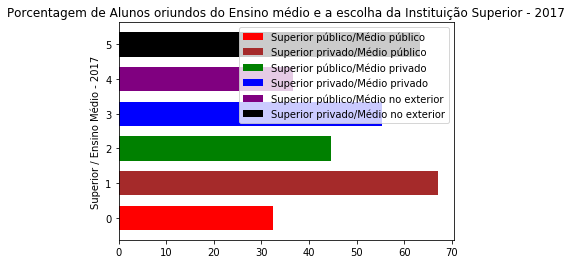

In [16]:
#Histograma Escolha Curso superior
from bokeh.plotting import figure, show

y = [total_p_ip[0], total_p_ipp[0], total_pp_ip[0], total_pp_ipp[0], total_e_ip[0], total_e_ipp[0]]
N = len(y)
x = range(N)
width = 0.7
plt.title('Porcentagem de Alunos oriundos do Ensino médio e a escolha da Instituição Superior - 2017')
plt.ylabel('Superior / Ensino Médio - 2017')
plt.barh(0, y[0], width, label='Superior público/Médio público', color="red")
plt.barh(1, y[1], width, label='Superior privado/Médio público', color="Brown")
plt.barh(2, y[2], width, label='Superior público/Médio privado', color="green")
plt.barh(3, y[3], width, label='Superior privado/Médio privado', color="blue")
plt.barh(4, y[4], width, label='Superior público/Médio no exterior', color="Purple")
plt.barh(5, y[5], width, label='Superior privado/Médio no exterior', color="black")
plt.rcParams['figure.figsize'] = (12,7)
plt.legend()
plt.show()


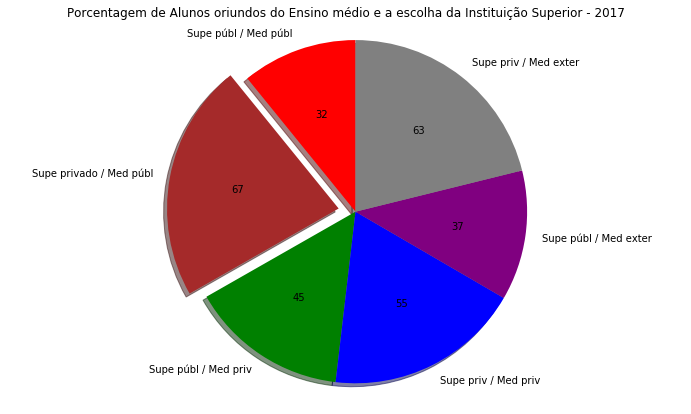

In [17]:
# Definindo variáveis

labels = legenda = ['Supe públ / Med públ', 'Supe privado / Med públ', 'Supe públ / Med priv', 'Supe priv / Med priv', 'Supe públ / Med exter', 'Supe priv / Med exter']
ensino = [total_p_ip[0], total_p_ipp[0], total_pp_ip[0], total_pp_ipp[0], total_e_ip[0], total_e_ipp[0]]
cores = ['red', 'Brown', 'green', 'blue', 'Purple', 'gray']
explode = (0, 0.1, 0, 0, 0, 0)  # somente explode primeiro pedaço
total = sum(ensino)
plt.pie(ensino, explode=explode, labels=labels, colors=cores, autopct=lambda p: '{:.0f}'.format(p * total / 100), shadow=True, startangle=90)
plt.title('Porcentagem de Alunos oriundos do Ensino médio e a escolha da Instituição Superior - 2017')
plt.rcParams['figure.figsize'] = (12,7) 
# Determina que as proporções sejam iguais ('equal') de modo a desenhar o círculo
plt.axis('equal') 
plt.show()

# salvando a imagem
#plt.savefig('Superior_Ensino_Médio-2017.png')

In [18]:
escola_publica16 = tabela[1][tabela[1]['QE_I17'] == 1]
escola_privada16 = tabela[1][tabela[1]['QE_I17'] == 2]
escola_exterior16 = tabela[1][tabela[1]['QE_I17'] == 3]

escola_publica.append(escola_publica16)
escola_privada.append(escola_privada16)
escola_exterior.append(escola_exterior16)

escola_publica[1].describe()

,CO_REGIAO_CURSO,CO_CATEGAD,QE_I17,NU_IDADE
count,138209.000000,138209.000000,138209.0,138209.000000
mean,3.041249,3.894414,1.0,28.908479
std,1.066944,1.292013,0.0,7.971771
min,1.000000,1.000000,1.0,17.000000
25%,2.000000,4.000000,1.0,23.000000
50%,3.000000,4.000000,1.0,26.000000
75%,4.000000,5.000000,1.0,33.000000
max,5.000000,5.000000,1.0,89.000000


In [19]:
escola_privada[1].describe()

,CO_REGIAO_CURSO,CO_CATEGAD,QE_I17,NU_IDADE
count,63846.000000,63846.000000,63846.0,63846.000000
mean,2.888685,3.476678,2.0,26.137002
std,0.981191,1.585878,0.0,6.154543
min,1.000000,1.000000,2.0,18.000000
25%,2.000000,2.000000,2.0,23.000000
50%,3.000000,4.000000,2.0,24.000000
75%,3.000000,5.000000,2.0,27.000000
max,5.000000,5.000000,2.0,77.000000


In [20]:

escola_exterior[1].describe()

,CO_REGIAO_CURSO,CO_CATEGAD,QE_I17,NU_IDADE
count,545.000000,545.000000,545.0,545.000000
mean,3.159633,3.656881,3.0,26.904587
std,0.888149,1.561742,0.0,6.059302
min,1.000000,1.000000,3.0,20.000000
25%,3.000000,2.000000,3.0,23.000000
50%,3.000000,4.000000,3.0,25.000000
75%,4.000000,5.000000,3.0,28.000000
max,5.000000,5.000000,3.0,64.000000


In [21]:
# ESCOLA PUBLICA vs CO_CATEGAD - 2016
p_ip16 = escola_publica[1].loc[(escola_publica[1].CO_CATEGAD == 1) | (escola_publica[1].CO_CATEGAD == 2) | 
                               (escola_publica[1].CO_CATEGAD == 3)]
p_ipp16 = escola_publica[1].loc[(escola_publica[1].CO_CATEGAD == 4) | (escola_publica[1].CO_CATEGAD == 5)]
pf16 = escola_publica[1].loc[(escola_publica[1].CO_CATEGAD == 1)]
pe16 = escola_publica[1].loc[(escola_publica[1].CO_CATEGAD == 2)]
pm16 = escola_publica[1].loc[(escola_publica[1].CO_CATEGAD == 3)]
pcl16 = escola_publica[1].loc[(escola_publica[1].CO_CATEGAD == 4)]
psl16 = escola_publica[1].loc[(escola_publica[1].CO_CATEGAD == 5)]

p_ip.append(p_ip16)
p_ipp.append(p_ipp16)
pf.append(pf16)
pe.append(pe16)
pm.append(pm16)
pcl.append(pcl16)
psl.append(psl16)

# ESCOLA PRIVADA vs CO_CATEGAD - 2016
pp_ip16 = escola_privada[1].loc[(escola_privada[1].CO_CATEGAD == 1) | (escola_privada[1].CO_CATEGAD == 2) | 
                                (escola_privada[1].CO_CATEGAD == 3)]
pp_ipp16 = escola_privada[1].loc[(escola_privada[1].CO_CATEGAD == 4) | (escola_privada[1].CO_CATEGAD == 5)]
ppf16 = escola_privada[1].loc[(escola_privada[1].CO_CATEGAD == 1)]
ppe16 = escola_privada[1].loc[(escola_privada[1].CO_CATEGAD == 2)]
ppm16 = escola_privada[1].loc[(escola_privada[1].CO_CATEGAD == 3)]
ppcl16 = escola_privada[1].loc[(escola_privada[1].CO_CATEGAD == 4)]
ppsl16 = escola_privada[1].loc[(escola_privada[1].CO_CATEGAD == 5)]

pp_ip.append(pp_ip16)
pp_ipp.append(pp_ipp16)
ppf.append(ppf16)
ppe.append(ppe16)
ppm.append(ppm16)
ppcl.append(ppcl16)
ppsl.append(ppsl16)

# ESCOLA EXTERIOR vs CO_CATEGAD - 2016
e_ip16 = escola_exterior[1].loc[(escola_exterior[1].CO_CATEGAD == 1) | (escola_exterior[1].CO_CATEGAD == 2) | 
                                (escola_exterior[1].CO_CATEGAD == 3)]
e_ipp16 = escola_exterior[1].loc[(escola_exterior[1].CO_CATEGAD == 4) | (escola_exterior[1].CO_CATEGAD == 5)]
ef16 = escola_exterior[1].loc[(escola_exterior[1].CO_CATEGAD == 1)]
ee16 = escola_exterior[1].loc[(escola_exterior[1].CO_CATEGAD == 2)]
em16 = escola_exterior[1].loc[(escola_exterior[1].CO_CATEGAD == 3)]
ecl16 = escola_exterior[1].loc[(escola_exterior[1].CO_CATEGAD == 4)]
esl16 = escola_exterior[1].loc[(escola_exterior[1].CO_CATEGAD == 5)]

e_ip.append(e_ip16)
e_ipp.append(e_ipp16)
ef.append(ef16)
ee.append(ee16)
em.append(em16)
ecl.append(ecl16)
esl.append(esl16)

In [22]:
total_p16 = escola_publica[1].shape[0]
total_pp16 = escola_privada[1].shape[0]
total_e16 = escola_exterior[1].shape[0]

total_p.append(total_p16)
total_pp.append(total_pp16)
total_e.append(total_e16)

total_p_ip16 = (p_ip[1].shape[0]/total_p[1]) * 100
total_p_ipp16 = (p_ipp[1].shape[0]/total_p[1]) * 100

total_pp_ip16 = (pp_ip[1].shape[0]/total_pp[1]) * 100
total_pp_ipp16 = (pp_ipp[1].shape[0]/total_pp[1]) * 100

total_e_ip16 = (e_ip[1].shape[0]/total_e[1]) * 100
total_e_ipp16 = (e_ipp[1].shape[0]/total_e[1]) * 100

total_p_ip.append(total_p_ip16)
total_p_ipp.append(total_p_ipp16)
total_pp_ip.append(total_pp_ip16)
total_pp_ipp.append(total_pp_ipp16)
total_e_ip.append(total_e_ip16)
total_e_ipp.append(total_e_ipp16)

print('ENADE - 2016 ESCOLHA DO CURSO SUPERIOR PÚBLICO OU PRIVADO VINDO DO:\n')
print('..... ENSINO MÉDIO PÚBLICO .....')
print('                                                                         Total pública = ', total_p[1])
print('(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio público = ', total_p_ip[1])
print('(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio público = ', total_p_ipp[1])
print('                                                                                 Total = ', total_p_ip[1] +  total_p_ipp[1])

print('\n..... ENSINO MÉDIO PRIVADO .....')
print('                                                                         Total privada = ', total_pp[1])
print('(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio privado = ', total_pp_ip[1])
print('(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio privado = ', total_pp_ipp[1])
print('                                                                                 Total = ', total_pp_ip[1] +  total_pp_ipp[1])

print('\n..... ENSINO MÉDIO EXTERIOR .....')
print('                                                                         Total exterior    = ', total_e[1])
print('(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio no exterior = ', total_e_ip[1])
print('(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio no exterior = ', total_e_ipp[1])
print('                                                                                     Total = ', total_e_ip[1] +  total_e_ipp[1])

ENADE - 2016 ESCOLHA DO CURSO SUPERIOR PÚBLICO OU PRIVADO VINDO DO:

..... ENSINO MÉDIO PÚBLICO .....
                                                                         Total pública =  138209
(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio público =  18.67027472885268
(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio público =  81.32972527114732
                                                                                 Total =  100.0

..... ENSINO MÉDIO PRIVADO .....
                                                                         Total privada =  63846
(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio privado =  33.13128465369796
(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio privado =  66.86871534630204
                                                                                 Total =  100.0

..... ENSINO MÉDIO EXTERIOR .....
            

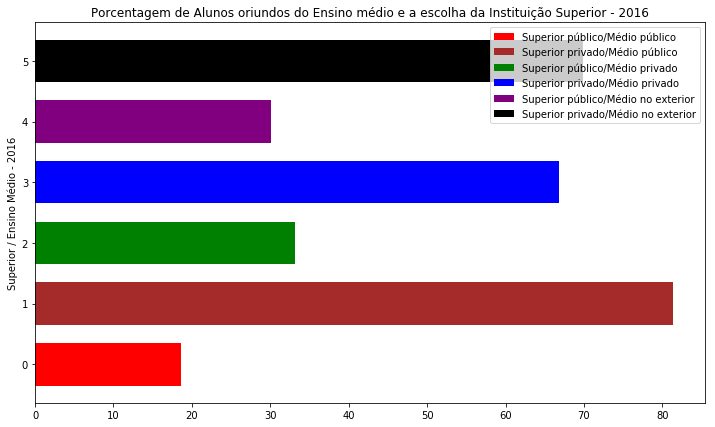

In [23]:
#Histograma Escolha Curso superior
from bokeh.plotting import figure, show

y = [total_p_ip[1], total_p_ipp[1], total_pp_ip[1], total_pp_ipp[1], total_e_ip[1], total_e_ipp[1]]
N = len(y)
x = range(N)
width = 0.7
plt.title('Porcentagem de Alunos oriundos do Ensino médio e a escolha da Instituição Superior - 2016')
plt.ylabel('Superior / Ensino Médio - 2016')
plt.barh(0, y[0], width, label='Superior público/Médio público', color="red")
plt.barh(1, y[1], width, label='Superior privado/Médio público', color="Brown")
plt.barh(2, y[2], width, label='Superior público/Médio privado', color="green")
plt.barh(3, y[3], width, label='Superior privado/Médio privado', color="blue")
plt.barh(4, y[4], width, label='Superior público/Médio no exterior', color="Purple")
plt.barh(5, y[5], width, label='Superior privado/Médio no exterior', color="black")
plt.rcParams['figure.figsize'] = (12,7)
plt.legend()
plt.show()


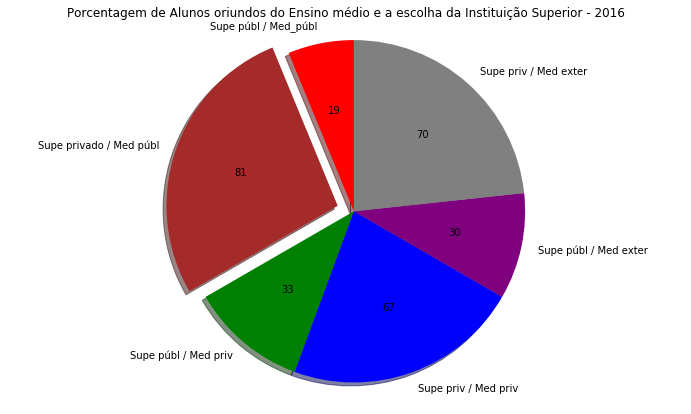

In [24]:
# Definindo variáveis

labels = legenda = ['Supe públ / Med_públ', 'Supe privado / Med públ', 'Supe públ / Med priv', 'Supe priv / Med priv', 'Supe públ / Med exter', 'Supe priv / Med exter']
ensino = [total_p_ip[1], total_p_ipp[1], total_pp_ip[1], total_pp_ipp[1], total_e_ip[1], total_e_ipp[1]]
cores = ['red', 'Brown', 'green', 'blue', 'Purple', 'gray']
explode = (0, 0.1, 0, 0, 0, 0)  # somente explode primeiro pedaço
total = sum(ensino)
plt.pie(ensino, explode=explode, labels=labels, colors=cores, autopct=lambda p: '{:.0f}'.format(p * total / 100), shadow=True, startangle=90)
plt.title('Porcentagem de Alunos oriundos do Ensino médio e a escolha da Instituição Superior - 2016')
plt.rcParams['figure.figsize'] = (12,7) 
# Determina que as proporções sejam iguais ('equal') de modo a desenhar o círculo
plt.axis('equal') 
plt.show()

In [25]:
escola_publica15 = tabela[2][tabela[2]['QE_I17'] == 1]
escola_privada15 = tabela[2][tabela[2]['QE_I17'] == 2]
escola_exterior15 = tabela[2][tabela[2]['QE_I17'] == 3]

escola_publica.append(escola_publica15)
escola_privada.append(escola_privada15)
escola_exterior.append(escola_exterior15)

escola_publica[2].describe()

,CO_REGIAO_CURSO,CO_CATEGAD,QE_I17,NU_IDADE
count,324852.000000,324852.000000,324852.0,324852.000000
mean,3.261784,4.132316,1.0,29.129779
std,0.985238,1.037720,0.0,8.058438
min,1.000000,1.000000,1.0,17.000000
25%,3.000000,4.000000,1.0,23.000000
50%,3.000000,4.000000,1.0,27.000000
75%,4.000000,5.000000,1.0,33.000000
max,5.000000,5.000000,1.0,88.000000


In [26]:
escola_privada[2].describe()

,CO_REGIAO_CURSO,CO_CATEGAD,QE_I17,NU_IDADE
count,141801.000000,141801.000000,141801.0,141801.000000
mean,3.031213,3.963815,2.0,26.874923
std,0.964240,1.353190,0.0,7.518686
min,1.000000,1.000000,2.0,16.000000
25%,2.000000,4.000000,2.0,22.000000
50%,3.000000,4.000000,2.0,24.000000
75%,4.000000,5.000000,2.0,28.000000
max,5.000000,5.000000,2.0,86.000000


In [27]:
escola_exterior[2].describe()

,CO_REGIAO_CURSO,CO_CATEGAD,QE_I17,NU_IDADE
count,2301.000000,2301.000000,2301.0,2301.000000
mean,3.237723,4.083007,3.0,25.918296
std,0.828557,1.347001,0.0,6.248987
min,1.000000,1.000000,3.0,19.000000
25%,3.000000,4.000000,3.0,22.000000
50%,3.000000,5.000000,3.0,24.000000
75%,4.000000,5.000000,3.0,27.000000
max,5.000000,5.000000,3.0,72.000000


In [28]:
# ESCOLA PUBLICA vs CO_CATEGAD - 2015
p_ip15 = escola_publica[2].loc[(escola_publica[2].CO_CATEGAD == 1) | (escola_publica[2].CO_CATEGAD == 2) | 
                               (escola_publica[2].CO_CATEGAD == 3)]
p_ipp15 = escola_publica[2].loc[(escola_publica[2].CO_CATEGAD == 4) | (escola_publica[2].CO_CATEGAD == 5)]
pf15 = escola_publica[2].loc[(escola_publica[2].CO_CATEGAD == 1)]
pe15 = escola_publica[2].loc[(escola_publica[2].CO_CATEGAD == 2)]
pm15 = escola_publica[2].loc[(escola_publica[2].CO_CATEGAD == 3)]
pcl15 = escola_publica[2].loc[(escola_publica[2].CO_CATEGAD == 4)]
psl15 = escola_publica[2].loc[(escola_publica[2].CO_CATEGAD == 5)]

p_ip.append(p_ip15)
p_ipp.append(p_ipp15)
pf.append(pf15)
pe.append(pe15)
pm.append(pm15)
pcl.append(pcl15)
psl.append(psl15)

# ESCOLA PRIVADA vs CO_CATEGAD - 2015
pp_ip15 = escola_privada[2].loc[(escola_privada[2].CO_CATEGAD == 1) | (escola_privada[2].CO_CATEGAD == 2) | 
                                (escola_privada[2].CO_CATEGAD == 3)]
pp_ipp15 = escola_privada[2].loc[(escola_privada[2].CO_CATEGAD == 4) | (escola_privada[2].CO_CATEGAD == 5)]
ppf15 = escola_privada[2].loc[(escola_privada[2].CO_CATEGAD == 1)]
ppe15 = escola_privada[2].loc[(escola_privada[2].CO_CATEGAD == 2)]
ppm15 = escola_privada[2].loc[(escola_privada[2].CO_CATEGAD == 3)]
ppcl15 = escola_privada[2].loc[(escola_privada[2].CO_CATEGAD == 4)]
ppsl15 = escola_privada[2].loc[(escola_privada[2].CO_CATEGAD == 5)]

pp_ip.append(pp_ip15)
pp_ipp.append(pp_ipp15)
ppf.append(ppf15)
ppe.append(ppe15)
ppm.append(ppm15)
ppcl.append(ppcl15)
ppsl.append(ppsl15)

# ESCOLA EXTERIOR vs CO_CATEGAD - 2015
e_ip15 = escola_exterior[2].loc[(escola_exterior[2].CO_CATEGAD == 1) | (escola_exterior[2].CO_CATEGAD == 2) | 
                                (escola_exterior[2].CO_CATEGAD == 3)]
e_ipp15 = escola_exterior[2].loc[(escola_exterior[2].CO_CATEGAD == 4) | (escola_exterior[2].CO_CATEGAD == 5)]
ef15 = escola_exterior[2].loc[(escola_exterior[2].CO_CATEGAD == 1)]
ee15 = escola_exterior[2].loc[(escola_exterior[2].CO_CATEGAD == 2)]
em15 = escola_exterior[2].loc[(escola_exterior[2].CO_CATEGAD == 3)]
ecl15 = escola_exterior[2].loc[(escola_exterior[2].CO_CATEGAD == 4)]
esl15 = escola_exterior[2].loc[(escola_exterior[2].CO_CATEGAD == 5)]

e_ip.append(e_ip15)
e_ipp.append(e_ipp15)
ef.append(ef15)
ee.append(ee15)
em.append(em15)
ecl.append(ecl15)
esl.append(esl15)

In [29]:
total_p15 = escola_publica[2].shape[0]
total_pp15 = escola_privada[2].shape[0]
total_e15 = escola_exterior[2].shape[0]

total_p.append(total_p15)
total_pp.append(total_pp15)
total_e.append(total_e15)

total_p_ip15 = (p_ip[2].shape[0]/total_p[2]) * 100
total_p_ipp15 = (p_ipp[2].shape[0]/total_p[2]) * 100

total_pp_ip15 = (pp_ip[2].shape[0]/total_pp[2]) * 100
total_pp_ipp15 = (pp_ipp[2].shape[0]/total_pp[2]) * 100

total_e_ip15 = (e_ip[2].shape[0]/total_e[2]) * 100
total_e_ipp15 = (e_ipp[2].shape[0]/total_e[2]) * 100

total_p_ip.append(total_p_ip15)
total_p_ipp.append(total_p_ipp15)
total_pp_ip.append(total_pp_ip15)
total_pp_ipp.append(total_pp_ipp15)
total_e_ip.append(total_e_ip15)
total_e_ipp.append(total_e_ipp15)

print('ENADE - 2015 ESCOLHA DO CURSO SUPERIOR PÚBLICO OU PRIVADO VINDO DO:\n')
print('..... ENSINO MÉDIO PÚBLICO .....')
print('                                                                         Total pública = ', total_p[2])
print('(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio público = ', total_p_ip[2])
print('(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio público = ', total_p_ipp[2])
print('                                                                                 Total = ', total_p_ip[2] +  total_p_ipp[2])

print('\n..... ENSINO MÉDIO PRIVADO .....')
print('                                                                         Total privada = ', total_pp[2])
print('(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio privado = ', total_pp_ip[2])
print('(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio privado = ', total_pp_ipp[2])
print('                                                                                 Total = ', total_pp_ip[2] +  total_pp_ipp[2])

print('\n..... ENSINO MÉDIO EXTERIOR .....')
print('                                                                         Total exterior    = ', total_e[2])
print('(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio no exterior = ', total_e_ip[2])
print('(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio no exterior = ', total_e_ipp[2])
print('                                                                                     Total = ', total_e_ip[2] +  total_e_ipp[2])

ENADE - 2015 ESCOLHA DO CURSO SUPERIOR PÚBLICO OU PRIVADO VINDO DO:

..... ENSINO MÉDIO PÚBLICO .....
                                                                         Total pública =  324852
(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio público =  11.582505263935577
(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio público =  88.41749473606443
                                                                                 Total =  100.0

..... ENSINO MÉDIO PRIVADO .....
                                                                         Total privada =  141801
(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio privado =  19.472359151204856
(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio privado =  80.52764084879514
                                                                                 Total =  100.0

..... ENSINO MÉDIO EXTERIOR .....
         

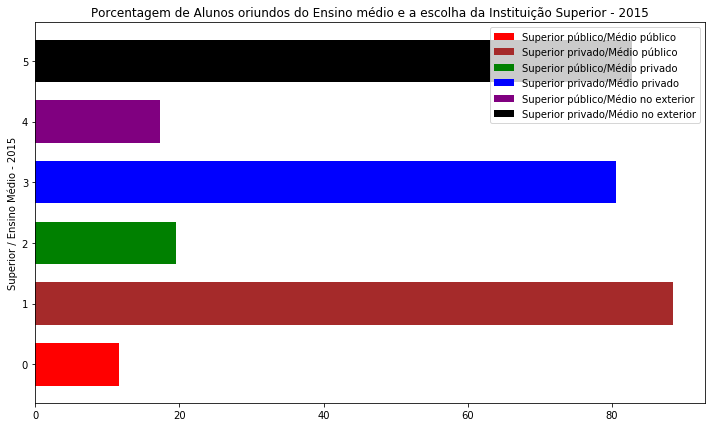

In [30]:
#Histograma Escolha Curso superior
from bokeh.plotting import figure, show

y = [total_p_ip[2], total_p_ipp[2], total_pp_ip[2], total_pp_ipp[2], total_e_ip[2], total_e_ipp[2]]
N = len(y)
x = range(N)
width = 0.7
plt.title('Porcentagem de Alunos oriundos do Ensino médio e a escolha da Instituição Superior - 2015')
plt.ylabel('Superior / Ensino Médio - 2015')
plt.barh(0, y[0], width, label='Superior público/Médio público', color="red")
plt.barh(1, y[1], width, label='Superior privado/Médio público', color="Brown")
plt.barh(2, y[2], width, label='Superior público/Médio privado', color="green")
plt.barh(3, y[3], width, label='Superior privado/Médio privado', color="blue")
plt.barh(4, y[4], width, label='Superior público/Médio no exterior', color="Purple")
plt.barh(5, y[5], width, label='Superior privado/Médio no exterior', color="black")
plt.rcParams['figure.figsize'] = (12,7)
plt.legend()
plt.show()


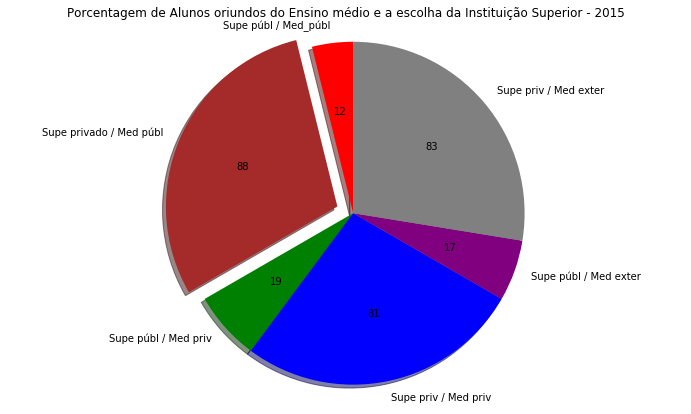

In [31]:
# Definindo variáveis

labels = legenda = ['Supe públ / Med_públ', 'Supe privado / Med públ', 'Supe públ / Med priv', 'Supe priv / Med priv', 'Supe públ / Med exter', 'Supe priv / Med exter']
ensino = [total_p_ip[2], total_p_ipp[2], total_pp_ip[2], total_pp_ipp[2], total_e_ip[2], total_e_ipp[2]]
cores = ['red', 'Brown', 'green', 'blue', 'Purple', 'gray']
explode = (0, 0.1, 0, 0, 0, 0)  # somente explode primeiro pedaço
total = sum(ensino)
plt.pie(ensino, explode=explode, labels=labels, colors=cores, autopct=lambda p: '{:.0f}'.format(p * total / 100), shadow=True, startangle=90)
plt.title('Porcentagem de Alunos oriundos do Ensino médio e a escolha da Instituição Superior - 2015')
plt.rcParams['figure.figsize'] = (12,7) 
# Determina que as proporções sejam iguais ('equal') de modo a desenhar o círculo
plt.axis('equal') 
plt.show()

In [32]:
escola_publica14 = tabela[3][tabela[3]['QE_I17'] == 1]
escola_privada14 = tabela[3][tabela[3]['QE_I17'] == 2]
escola_exterior14 = tabela[3][tabela[3]['QE_I17'] == 3]

escola_publica.append(escola_publica14)
escola_privada.append(escola_privada14)
escola_exterior.append(escola_exterior14)

escola_publica[3].describe()

,CO_REGIAO_CURSO,CO_CATEGAD,QE_I17,NU_IDADE
count,313337.000000,313337.000000,313337.0,313337.000000
mean,3.031640,3.422906,1.0,30.406138
std,1.038268,1.524600,0.0,8.532978
min,1.000000,1.000000,1.0,17.000000
25%,2.000000,2.000000,1.0,24.000000
50%,3.000000,4.000000,1.0,28.000000
75%,4.000000,5.000000,1.0,35.000000
max,5.000000,5.000000,1.0,78.000000


In [33]:
escola_privada[3].describe()

,CO_REGIAO_CURSO,CO_CATEGAD,QE_I17,NU_IDADE
count,103453.000000,103453.000000,103453.0,103453.000000
mean,3.011715,3.108532,2.0,27.165205
std,0.921428,1.709546,0.0,7.412703
min,1.000000,1.000000,2.0,17.000000
25%,2.000000,1.000000,2.0,23.000000
50%,3.000000,4.000000,2.0,24.000000
75%,3.000000,5.000000,2.0,28.000000
max,5.000000,5.000000,2.0,82.000000


In [34]:
escola_exterior[3].describe()

,CO_REGIAO_CURSO,CO_CATEGAD,QE_I17,NU_IDADE
count,1247.000000,1247.000000,1247.0,1247.000000
mean,3.207698,3.412991,3.0,27.678428
std,0.871893,1.665028,0.0,7.551325
min,1.000000,1.000000,3.0,19.000000
25%,3.000000,2.000000,3.0,23.000000
50%,3.000000,4.000000,3.0,25.000000
75%,4.000000,5.000000,3.0,29.000000
max,5.000000,5.000000,3.0,68.000000


In [35]:
# ESCOLA PUBLICA vs CO_CATEGAD - 2014
p_ip14 = escola_publica[3].loc[(escola_publica[3].CO_CATEGAD == 1) | (escola_publica[3].CO_CATEGAD == 2) | 
                               (escola_publica[3].CO_CATEGAD == 3)]
p_ipp14 = escola_publica[3].loc[(escola_publica[3].CO_CATEGAD == 4) | (escola_publica[3].CO_CATEGAD == 5)]
pf14 = escola_publica[3].loc[(escola_publica[3].CO_CATEGAD == 1)]
pe14 = escola_publica[3].loc[(escola_publica[3].CO_CATEGAD == 2)]
pm14 = escola_publica[3].loc[(escola_publica[3].CO_CATEGAD == 3)]
pcl14 = escola_publica[3].loc[(escola_publica[3].CO_CATEGAD == 4)]
psl14 = escola_publica[3].loc[(escola_publica[3].CO_CATEGAD == 5)]

p_ip.append(p_ip14)
p_ipp.append(p_ipp14)
pf.append(pf14)
pe.append(pe14)
pm.append(pm14)
pcl.append(pcl14)
psl.append(psl14)

# ESCOLA PRIVADA vs CO_CATEGAD - 2014
pp_ip14 = escola_privada[3].loc[(escola_privada[3].CO_CATEGAD == 1) | (escola_privada[3].CO_CATEGAD == 2) | 
                                (escola_privada[3].CO_CATEGAD == 3)]
pp_ipp14 = escola_privada[3].loc[(escola_privada[3].CO_CATEGAD == 4) | (escola_privada[3].CO_CATEGAD == 5)]
ppf14 = escola_privada[3].loc[(escola_privada[3].CO_CATEGAD == 1)]
ppe14 = escola_privada[3].loc[(escola_privada[3].CO_CATEGAD == 2)]
ppm14 = escola_privada[3].loc[(escola_privada[3].CO_CATEGAD == 3)]
ppcl14 = escola_privada[3].loc[(escola_privada[3].CO_CATEGAD == 4)]
ppsl14 = escola_privada[3].loc[(escola_privada[3].CO_CATEGAD == 5)]

pp_ip.append(pp_ip14)
pp_ipp.append(pp_ipp14)
ppf.append(ppf14)
ppe.append(ppe14)
ppm.append(ppm14)
ppcl.append(ppcl14)
ppsl.append(ppsl14)

# ESCOLA EXTERIOR vs CO_CATEGAD - 2014
e_ip14 = escola_exterior[3].loc[(escola_exterior[3].CO_CATEGAD == 1) | (escola_exterior[3].CO_CATEGAD == 2) | 
                                (escola_exterior[3].CO_CATEGAD == 3)]
e_ipp14 = escola_exterior[3].loc[(escola_exterior[3].CO_CATEGAD == 4) | (escola_exterior[3].CO_CATEGAD == 5)]
ef14 = escola_exterior[3].loc[(escola_exterior[3].CO_CATEGAD == 1)]
ee14 = escola_exterior[3].loc[(escola_exterior[3].CO_CATEGAD == 2)]
em14 = escola_exterior[3].loc[(escola_exterior[3].CO_CATEGAD == 3)]
ecl14 = escola_exterior[3].loc[(escola_exterior[3].CO_CATEGAD == 4)]
esl14 = escola_exterior[3].loc[(escola_exterior[3].CO_CATEGAD == 5)]

e_ip.append(e_ip14)
e_ipp.append(e_ipp14)
ef.append(ef14)
ee.append(ee14)
em.append(em14)
ecl.append(ecl14)
esl.append(esl14)

In [36]:
total_p14 = escola_publica[3].shape[0]
total_pp14 = escola_privada[3].shape[0]
total_e14 = escola_exterior[3].shape[0]

total_p.append(total_p14)
total_pp.append(total_pp14)
total_e.append(total_e14)

total_p_ip14 = (p_ip[3].shape[0]/total_p[3]) * 100
total_p_ipp14 = (p_ipp[3].shape[0]/total_p[3]) * 100

total_pp_ip14 = (pp_ip[3].shape[0]/total_pp[3]) * 100
total_pp_ipp14 = (pp_ipp[3].shape[0]/total_pp[3]) * 100

total_e_ip14 = (e_ip[3].shape[0]/total_e[3]) * 100
total_e_ipp14 = (e_ipp[3].shape[0]/total_e[3]) * 100

total_p_ip.append(total_p_ip14)
total_p_ipp.append(total_p_ipp14)
total_pp_ip.append(total_pp_ip14)
total_pp_ipp.append(total_pp_ipp14)
total_e_ip.append(total_e_ip14)
total_e_ipp.append(total_e_ipp14)

print('ENADE - 2014 ESCOLHA DO CURSO SUPERIOR PÚBLICO OU PRIVADO VINDO DO:\n')
print('..... ENSINO MÉDIO PÚBLICO .....')
print('                                                                         Total pública = ', total_p[3])
print('(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio público = ', total_p_ip[3])
print('(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio público = ', total_p_ipp[3])
print('                                                                                 Total = ', total_p_ip[3] +  total_p_ipp[3])

print('\n..... ENSINO MÉDIO PRIVADO .....')
print('                                                                         Total privada = ', total_pp[3])
print('(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio privado = ', total_pp_ip[3])
print('(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio privado = ', total_pp_ipp[3])
print('                                                                                 Total = ', total_pp_ip[3] +  total_pp_ipp[3])

print('\n..... ENSINO MÉDIO EXTERIOR .....')
print('                                                                         Total exterior    = ', total_e[3])
print('(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio no exterior = ', total_e_ip[3])
print('(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio no exterior = ', total_e_ipp[3])
print('                                                                                     Total = ', total_e_ip[3] +  total_e_ipp[3])

ENADE - 2014 ESCOLHA DO CURSO SUPERIOR PÚBLICO OU PRIVADO VINDO DO:

..... ENSINO MÉDIO PÚBLICO .....
                                                                         Total pública =  313337
(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio público =  36.2335121610279
(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio público =  63.7664878389721
                                                                                 Total =  100.0

..... ENSINO MÉDIO PRIVADO .....
                                                                         Total privada =  103453
(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio privado =  46.080828975476784
(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio privado =  53.919171024523216
                                                                                 Total =  100.0

..... ENSINO MÉDIO EXTERIOR .....
           

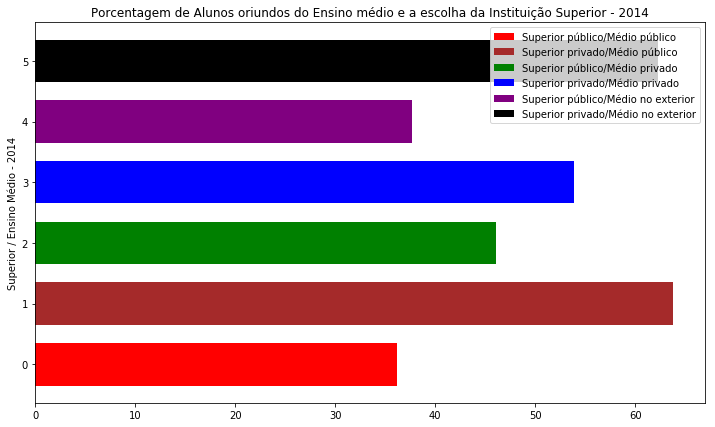

In [37]:
#Histograma Escolha Curso superior
from bokeh.plotting import figure, show

y = [total_p_ip[3], total_p_ipp[3], total_pp_ip[3], total_pp_ipp[3], total_e_ip[3], total_e_ipp[3]]
N = len(y)
x = range(N)
width = 0.7
plt.title('Porcentagem de Alunos oriundos do Ensino médio e a escolha da Instituição Superior - 2014')
plt.ylabel('Superior / Ensino Médio - 2014')
plt.barh(0, y[0], width, label='Superior público/Médio público', color="red")
plt.barh(1, y[1], width, label='Superior privado/Médio público', color="Brown")
plt.barh(2, y[2], width, label='Superior público/Médio privado', color="green")
plt.barh(3, y[3], width, label='Superior privado/Médio privado', color="blue")
plt.barh(4, y[4], width, label='Superior público/Médio no exterior', color="Purple")
plt.barh(5, y[5], width, label='Superior privado/Médio no exterior', color="black")
plt.rcParams['figure.figsize'] = (12,7)
plt.legend()
plt.show()


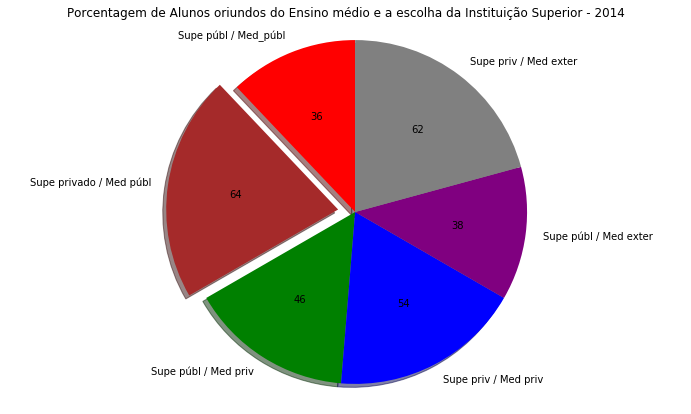

In [38]:
# Definindo variáveis

labels = legenda = ['Supe públ / Med_públ', 'Supe privado / Med públ', 'Supe públ / Med priv', 'Supe priv / Med priv', 'Supe públ / Med exter', 'Supe priv / Med exter']
ensino = [total_p_ip[3], total_p_ipp[3], total_pp_ip[3], total_pp_ipp[3], total_e_ip[3], total_e_ipp[3]]
cores = ['red', 'Brown', 'green', 'blue', 'Purple', 'gray']
explode = (0, 0.1, 0, 0, 0, 0)  # somente explode primeiro pedaço
total = sum(ensino)
plt.pie(ensino, explode=explode, labels=labels, colors=cores, autopct=lambda p: '{:.0f}'.format(p * total / 100), shadow=True, startangle=90)
plt.title('Porcentagem de Alunos oriundos do Ensino médio e a escolha da Instituição Superior - 2014')
plt.rcParams['figure.figsize'] = (12,7) 
# Determina que as proporções sejam iguais ('equal') de modo a desenhar o círculo
plt.axis('equal') 
plt.show()

In [39]:
escola_publica13 = tabela[4][tabela[4]['QE_I17'] == 1]
escola_privada13 = tabela[4][tabela[4]['QE_I17'] == 2]
escola_exterior13 = tabela[4][tabela[4]['QE_I17'] == 3]

escola_publica.append(escola_publica13)
escola_privada.append(escola_privada13)
escola_exterior.append(escola_exterior13)

escola_publica[4].describe()

,CO_REGIAO_CURSO,CO_CATEGAD,QE_I17,NU_IDADE
count,143911.000000,143911.000000,143911.0,143911.000000
mean,3.092460,3.760338,1.0,26.902078
std,1.052753,1.450037,0.0,6.649537
min,1.000000,1.000000,1.0,18.000000
25%,2.000000,4.000000,1.0,23.000000
50%,3.000000,4.000000,1.0,25.000000
75%,4.000000,5.000000,1.0,29.000000
max,5.000000,5.000000,1.0,79.000000


In [40]:
escola_privada[4].describe()

,CO_REGIAO_CURSO,CO_CATEGAD,QE_I17,NU_IDADE
count,12686.000000,12686.000000,12686.0,12686.000000
mean,3.168611,3.874429,2.0,33.685874
std,0.954063,1.344164,0.0,9.692949
min,1.000000,1.000000,2.0,19.000000
25%,3.000000,4.000000,2.0,25.000000
50%,3.000000,4.000000,2.0,33.000000
75%,4.000000,5.000000,2.0,40.000000
max,5.000000,5.000000,2.0,78.000000


In [41]:
escola_exterior[4].describe()

,CO_REGIAO_CURSO,CO_CATEGAD,QE_I17,NU_IDADE
count,5777.000000,5777.000000,5777.0,5777.000000
mean,3.228838,4.160983,3.0,36.515666
std,1.065341,0.966034,0.0,9.006873
min,1.000000,1.000000,3.0,19.000000
25%,2.000000,4.000000,3.0,30.000000
50%,3.000000,4.000000,3.0,36.000000
75%,4.000000,5.000000,3.0,42.000000
max,5.000000,5.000000,3.0,79.000000


In [42]:
# ESCOLA PUBLICA vs CO_CATEGAD - 2013
p_ip13 = escola_publica[4].loc[(escola_publica[4].CO_CATEGAD == 1) | (escola_publica[4].CO_CATEGAD == 2) | 
                               (escola_publica[4].CO_CATEGAD == 3)]
p_ipp13 = escola_publica[4].loc[(escola_publica[4].CO_CATEGAD == 4) | (escola_publica[4].CO_CATEGAD == 5)]
pf13 = escola_publica[4].loc[(escola_publica[4].CO_CATEGAD == 1)]
pe13 = escola_publica[4].loc[(escola_publica[4].CO_CATEGAD == 2)]
pm13 = escola_publica[4].loc[(escola_publica[4].CO_CATEGAD == 3)]
pcl13 = escola_publica[4].loc[(escola_publica[4].CO_CATEGAD == 4)]
psl13 = escola_publica[4].loc[(escola_publica[4].CO_CATEGAD == 5)]

p_ip.append(p_ip13)
p_ipp.append(p_ipp13)
pf.append(pf13)
pe.append(pe13)
pm.append(pm13)
pcl.append(pcl13)
psl.append(psl13)

# ESCOLA PRIVADA vs CO_CATEGAD - 2013
pp_ip13 = escola_privada[4].loc[(escola_privada[4].CO_CATEGAD == 1) | (escola_privada[4].CO_CATEGAD == 2) | 
                                (escola_privada[4].CO_CATEGAD == 3)]
pp_ipp13 = escola_privada[4].loc[(escola_privada[4].CO_CATEGAD == 4) | (escola_privada[4].CO_CATEGAD == 5)]
ppf13 = escola_privada[4].loc[(escola_privada[4].CO_CATEGAD == 1)]
ppe13 = escola_privada[4].loc[(escola_privada[4].CO_CATEGAD == 2)]
ppm13 = escola_privada[4].loc[(escola_privada[4].CO_CATEGAD == 3)]
ppcl13 = escola_privada[4].loc[(escola_privada[4].CO_CATEGAD == 4)]
ppsl13 = escola_privada[4].loc[(escola_privada[4].CO_CATEGAD == 5)]

pp_ip.append(pp_ip13)
pp_ipp.append(pp_ipp13)
ppf.append(ppf13)
ppe.append(ppe13)
ppm.append(ppm13)
ppcl.append(ppcl13)
ppsl.append(ppsl13)

# ESCOLA EXTERIOR vs CO_CATEGAD - 2013
e_ip13 = escola_exterior[4].loc[(escola_exterior[4].CO_CATEGAD == 1) | (escola_exterior[4].CO_CATEGAD == 2) | 
                                (escola_exterior[4].CO_CATEGAD == 3)]
e_ipp13 = escola_exterior[4].loc[(escola_exterior[4].CO_CATEGAD == 4) | (escola_exterior[4].CO_CATEGAD == 5)]
ef13 = escola_exterior[4].loc[(escola_exterior[4].CO_CATEGAD == 1)]
ee13 = escola_exterior[4].loc[(escola_exterior[4].CO_CATEGAD == 2)]
em13 = escola_exterior[4].loc[(escola_exterior[4].CO_CATEGAD == 3)]
ecl13 = escola_exterior[4].loc[(escola_exterior[4].CO_CATEGAD == 4)]
esl13 = escola_exterior[4].loc[(escola_exterior[4].CO_CATEGAD == 5)]

e_ip.append(e_ip13)
e_ipp.append(e_ipp13)
ef.append(ef13)
ee.append(ee13)
em.append(em13)
ecl.append(ecl13)
esl.append(esl13)

In [43]:
total_p13 = escola_publica[4].shape[0]
total_pp13 = escola_privada[4].shape[0]
total_e13 = escola_exterior[4].shape[0]

total_p.append(total_p13)
total_pp.append(total_pp13)
total_e.append(total_e13)

total_p_ip13 = (p_ip[4].shape[0]/total_p[4]) * 100
total_p_ipp13 = (p_ipp[4].shape[0]/total_p[4]) * 100

total_pp_ip13 = (pp_ip[4].shape[0]/total_pp[4]) * 100
total_pp_ipp13 = (pp_ipp[4].shape[0]/total_pp[4]) * 100

total_e_ip13 = (e_ip[4].shape[0]/total_e[4]) * 100
total_e_ipp13 = (e_ipp[4].shape[0]/total_e[4]) * 100

total_p_ip.append(total_p_ip13)
total_p_ipp.append(total_p_ipp13)
total_pp_ip.append(total_pp_ip13)
total_pp_ipp.append(total_pp_ipp13)
total_e_ip.append(total_e_ip13)
total_e_ipp.append(total_e_ipp13)

print('ENADE - 2013 ESCOLHA DO CURSO SUPERIOR PÚBLICO OU PRIVADO VINDO DO:\n')
print('..... ENSINO MÉDIO PÚBLICO .....')
print('                                                                         Total pública = ', total_p[4])
print('(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio público = ', total_p_ip[4])
print('(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio público = ', total_p_ipp[4])
print('                                                                                 Total = ', total_p_ip[4] +  total_p_ipp[4])

print('\n..... ENSINO MÉDIO PRIVADO .....')
print('                                                                         Total privada = ', total_pp[4])
print('(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio privado = ', total_pp_ip[4])
print('(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio privado = ', total_pp_ipp[4])
print('                                                                                 Total = ', total_pp_ip[4] +  total_pp_ipp[4])

print('\n..... ENSINO MÉDIO EXTERIOR .....')
print('                                                                         Total exterior    = ', total_e[4])
print('(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio no exterior = ', total_e_ip[4])
print('(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio no exterior = ', total_e_ipp[4])
print('                                                                                     Total = ', total_e_ip[4] +  total_e_ipp[4])

ENADE - 2013 ESCOLHA DO CURSO SUPERIOR PÚBLICO OU PRIVADO VINDO DO:

..... ENSINO MÉDIO PÚBLICO .....
                                                                         Total pública =  143911
(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio público =  24.944583805268532
(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio público =  75.05541619473146
                                                                                 Total =  100.0

..... ENSINO MÉDIO PRIVADO .....
                                                                         Total privada =  12686
(%) de alunos que optaram por Ensino Superior público e estudaram Ensino Médio privado =  20.36102790477692
(%) de alunos que optaram por Ensino Superior privado e estudaram Ensino Médio privado =  79.63897209522308
                                                                                 Total =  100.0

..... ENSINO MÉDIO EXTERIOR .....
           

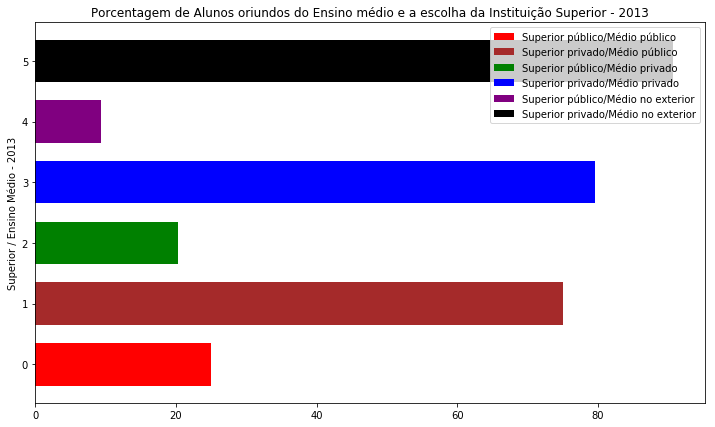

In [44]:
#Histograma Escolha Curso superior
from bokeh.plotting import figure, show

y = [total_p_ip[4], total_p_ipp[4], total_pp_ip[4], total_pp_ipp[4], total_e_ip[4], total_e_ipp[4]]
N = len(y)
x = range(N)
width = 0.7
plt.title('Porcentagem de Alunos oriundos do Ensino médio e a escolha da Instituição Superior - 2013')
plt.ylabel('Superior / Ensino Médio - 2013')
plt.barh(0, y[0], width, label='Superior público/Médio público', color="red")
plt.barh(1, y[1], width, label='Superior privado/Médio público', color="Brown")
plt.barh(2, y[2], width, label='Superior público/Médio privado', color="green")
plt.barh(3, y[3], width, label='Superior privado/Médio privado', color="blue")
plt.barh(4, y[4], width, label='Superior público/Médio no exterior', color="Purple")
plt.barh(5, y[5], width, label='Superior privado/Médio no exterior', color="black")
plt.rcParams['figure.figsize'] = (12,7)
plt.legend()
plt.show()


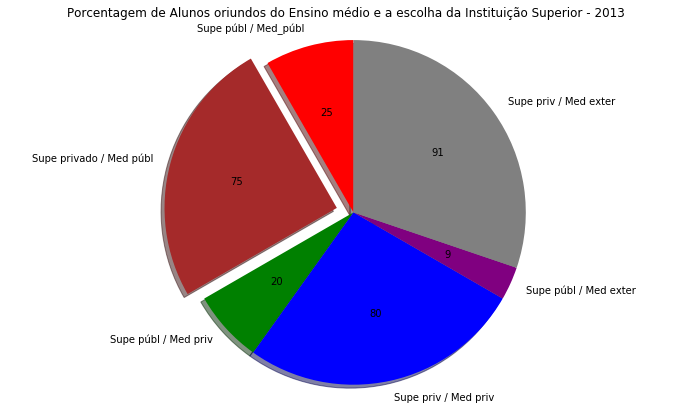

In [45]:
# Definindo variáveis

labels = legenda = ['Supe públ / Med_públ', 'Supe privado / Med públ', 'Supe públ / Med priv', 
                    'Supe priv / Med priv', 'Supe públ / Med exter', 'Supe priv / Med exter']
ensino = [total_p_ip[4], total_p_ipp[4], total_pp_ip[4], total_pp_ipp[4], total_e_ip[4], 
          total_e_ipp[4]]
cores = ['red', 'Brown', 'green', 'blue', 'Purple', 'gray']
explode = (0, 0.1, 0, 0, 0, 0)  # somente explode primeiro pedaço
total = sum(ensino)
plt.pie(ensino, explode=explode, labels=labels, colors=cores, 
        autopct=lambda p: '{:.0f}'.format(p * total / 100), shadow=True, startangle=90)
plt.title('Porcentagem de Alunos oriundos do Ensino médio e a escolha da Instituição Superior - 2013')
plt.rcParams['figure.figsize'] = (12,7) 
# Determina que as proporções sejam iguais ('equal') de modo a desenhar o círculo
plt.axis('equal') 
plt.show()

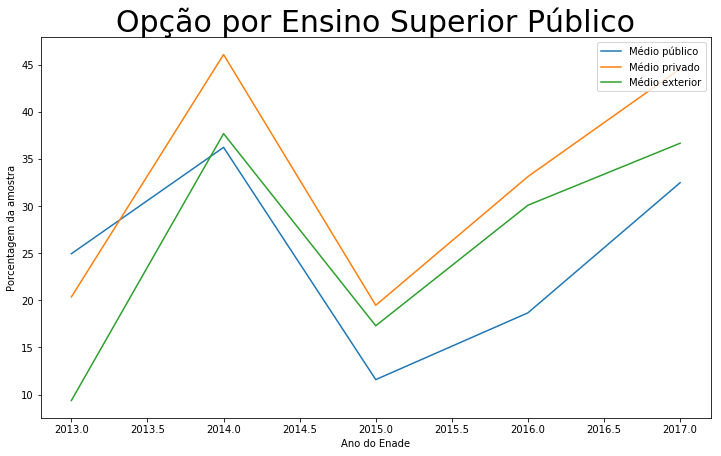

In [46]:
anos = [2017, 2016, 2015, 2014, 2013]

legenda = ["Pública", "Privada", "Exterior"]

# Plotar 3 series de dados 
plt.plot(anos, total_p_ip)
plt.plot(anos, total_pp_ip)
plt.plot(anos, total_e_ip)
# Definir label, titulo e quadro com legenda
plt.ylabel("Porcentagem da amostra")
plt.xlabel("Ano do Enade")
plt.title("Opção por Ensino Superior Público", fontsize=30)
plt.legend(('Médio público', 'Médio privado', 'Médio exterior'),
           loc='upper right')
plt.show()

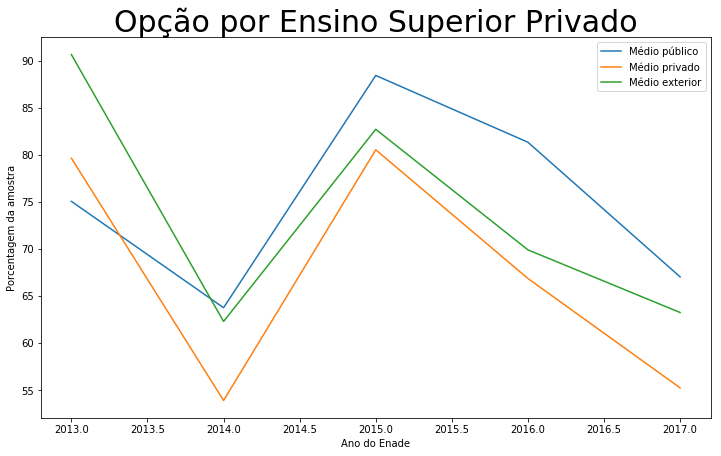

In [47]:
# Plotar 3 series de dados 
plt.plot(anos, total_p_ipp)
plt.plot(anos, total_pp_ipp)
plt.plot(anos, total_e_ipp)
# Definir label, titulo e quadro com legenda
plt.ylabel("Porcentagem da amostra")
plt.xlabel("Ano do Enade")
plt.title("Opção por Ensino Superior Privado", fontsize=30)
plt.legend(('Médio público', 'Médio privado', 'Médio exterior'),
           loc='upper right')
plt.show()

In [48]:
total_p

[340346, 138209, 324852, 313337, 143911]

In [49]:
total_pp

[125481, 63846, 141801, 103453, 12686]

In [50]:
total_e

[1448, 545, 2301, 1247, 5777]

In [51]:
# #Mapeamento e retirada nos valores nulos
# tabela17 = pandas.DataFrame(enade[0], columns = ['CO_REGIAO_CURSO', 'QE_I17','NU_IDADE', 'TP_SEXO'])

# ##Ignora valores nulos
# tabela17 = tabela17.loc[(tabela17['QE_I17'].notnull())]
# tabela17 = tabela17.loc[(tabela17['CO_REGIAO_CURSO'].notnull())]
# tabela17 = tabela17.loc[(tabela17['NU_IDADE'].notnull())]
# tabela17 = tabela17.loc[(tabela17['TP_SEXO'].notnull())]

# ##Mapeamento questão 17
# tabela17['QE_I17'] = tabela17['QE_I17'].map({'A': 1, 'B': 2, 'C': 3, 'D': 1,'E': 2, 'F':3})

# #Mapeamento tipo sexo
# tabela17['TP_SEXO'] = tabela17['TP_SEXO'].map({'M': 0, 'F': 1})                            
                                                        
# tabela17_target = pandas.DataFrame(enade[0], columns = ['CO_CATEGAD'])
# tabela17_target = tabela17_target.loc[(tabela17_target['CO_CATEGAD'].notnull())]                             

In [60]:
# tabela17.shape[0]
tabela17.shape

(467275, 6)

In [22]:
# tabela17['CO_CATEGAD']

In [93]:
# Classificador KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection  import  train_test_split 

#Algoritmo knn passando o valor de k=150
knn = KNeighborsClassifier(n_neighbors = 50)

# TESTES 01
X = tabela17
X = X.drop(['CO_CATEGAD'], axis = 1)
y = tabela17['CO_CATEGAD'] # target


# dados de treinamento 'até 40%' da base
X_train ,  X_test ,  y_train ,  y_teste  =  train_test_split (X ,  y ,  test_size = 0.7 ,  random_state = 42) 

knn.fit(X_train,y_train)

# validacão com o restante dos dados
y_pred = knn.predict(X_test)

#resultado encontrado
# print(y_pred)
#resultado esperado
# print(y_teste)   

#Precisão da predição
precisao = knn.score(X_test, y_teste) #Teste em porcentagem.

print('Precisão obtida: ', precisao)

Precisão obtida:  0.6339656647116324


In [21]:
# Random Forest Classification

X = tabela17
X = X.drop(['CO_CATEGAD'], axis = 1)
y = tabela17['CO_CATEGAD'] # target

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
RFCX_train, RFCX_test, RFCy_train, RFCy_test = train_test_split(X, y, test_size = 0.7, random_state = 42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
RFCX_train = sc.fit_transform(RFCX_train)
RFCX_test = sc.transform(RFCX_test)

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
#tenta vários números de arvores p ver o melhor resultado
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0) 
classifier.fit(RFCX_train, RFCy_train)

# Predicting the Test set results
RFCy_pred = classifier.predict(RFCX_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(RFCy_test, RFCy_pred)

print("\n CONFUSION MATRIX: \n", cm)

#Precisão da predição
precisao = classifier.score(RFCX_test, RFCy_test) #Teste em porcentagem.

print('Precisão obtida: ', precisao)


 CONFUSION MATRIX: 
 [[ 19393  97293      0]
 [ 16911 192469      0]
 [    54   1240      0]]
Precisão obtida:  0.6471835288367547
